# Classification 1

## Logistics Regression

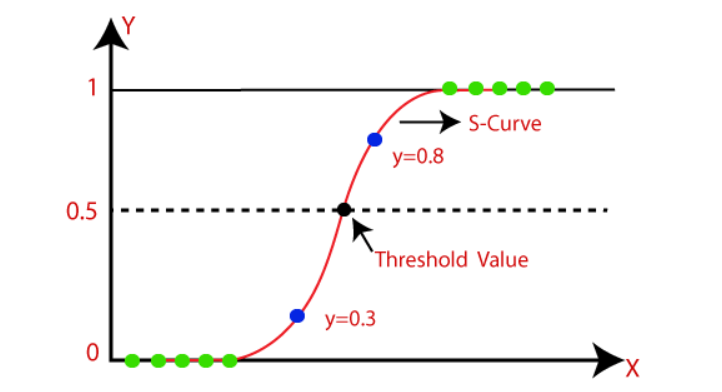

Regresi logistik adalah teknik analisis data yang menggunakan matematika untuk menemukan hubungan antara dua faktor data. Kemudian menggunakan hubungan ini untuk memprediksi nilai dari salah satu faktor tersebut berdasarkan faktor yang lain. Prediksi biasanya memiliki jumlah hasil yang terbatas, seperti ya atau tidak.

# Evaluating Matrics

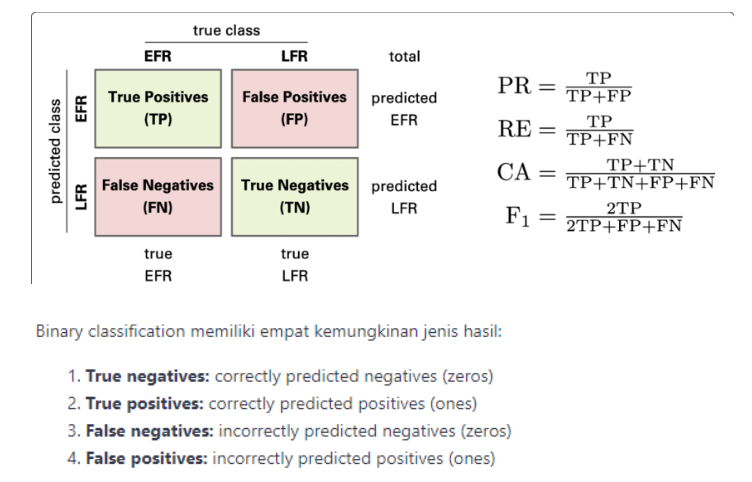

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# K-Nearest Neighboor

In [2]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [3]:
model = LogisticRegression(solver='liblinear',random_state=2024)

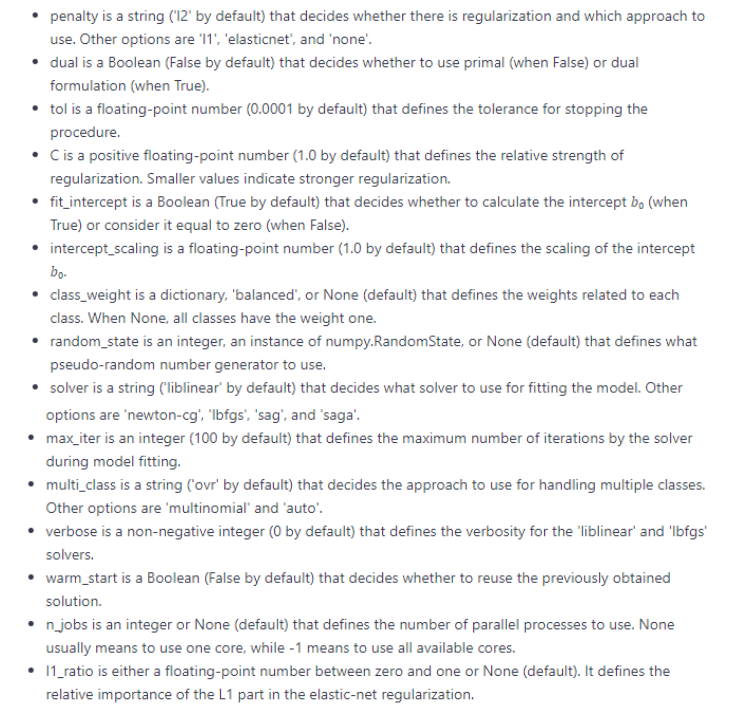

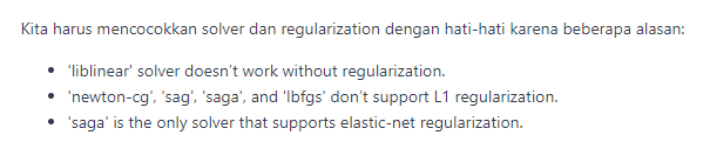

In [4]:
model.fit(x,y)

LogisticRegression(random_state=2024, solver='liblinear')

In [5]:
print(model.intercept_,model.coef_)

[-1.04608067] [[0.51491375]]


In [6]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [8]:
model.score(x,y)

0.9

In [9]:
y_pred = model.predict(x)

In [10]:
confusion_matrix(y,y_pred)

array([[3, 1],
       [0, 6]], dtype=int64)

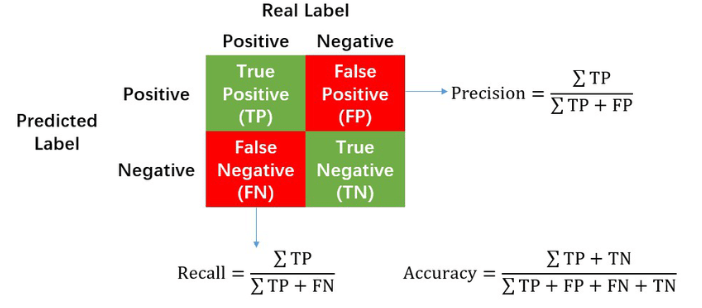

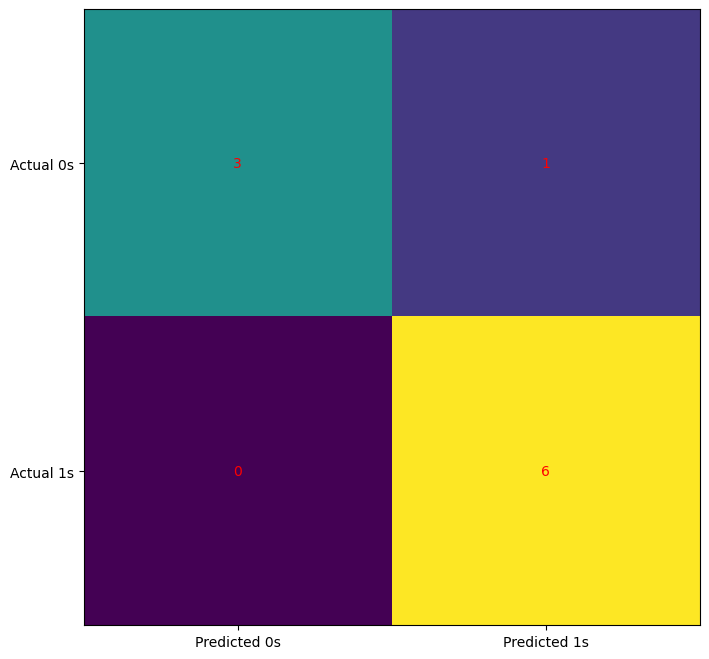

In [11]:
cm = confusion_matrix(y,y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

In [12]:
TP = 6
FP = 1
FN = 0 
TN = 3

acc = (TP+TN)/(TP+FP+TN+FN)
pre = (TP) / (TP+FP)
re = (TP) /(TP+FN)
f1 = (TP+TP) / (TP+TP+FP+FN)
print(acc)
print(pre)
print(re)
print(f1)

0.9
0.8571428571428571
1.0
0.9230769230769231


In [13]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



# Model Improvement

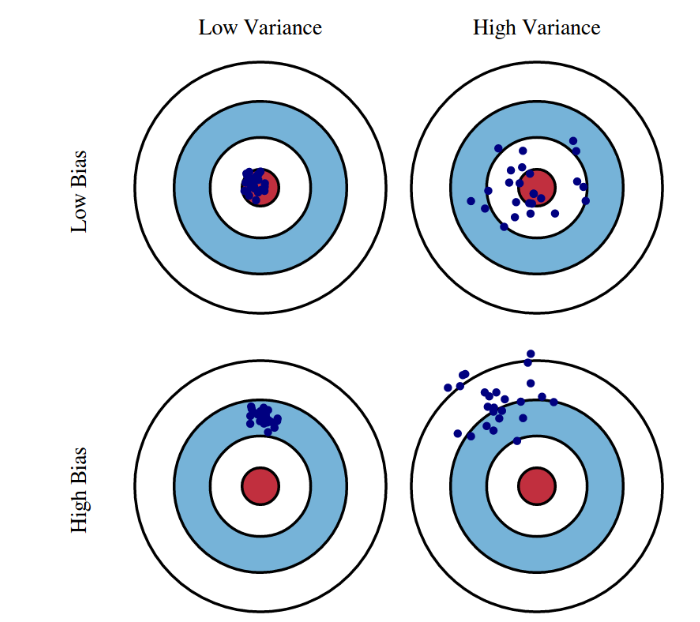

In [14]:
model_tuned  = LogisticRegression(solver='liblinear',C=10, random_state=2024)
model_tuned.fit(x,y)

LogisticRegression(C=10, random_state=2024, solver='liblinear')

In [15]:
model_tuned.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [16]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [17]:
y_pred_tuned = model_tuned.predict(x)

In [18]:
confusion_matrix(y,y_pred_tuned)

array([[4, 0],
       [0, 6]], dtype=int64)

In [19]:
print(classification_report(y,y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Logistic Regression for Handwriting Recognition

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
x,y  = load_digits(return_X_y=True)

In [23]:
print(x,'\n',y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 
 [0 1 2 ... 8 9 8]


In [24]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=2024)

In [25]:
x_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  1., 11., ..., 10.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ..., 16.,  2.,  0.],
       [ 0.,  1., 13., ..., 12.,  5.,  0.],
       [ 0.,  0.,  9., ...,  1.,  0.,  0.]])

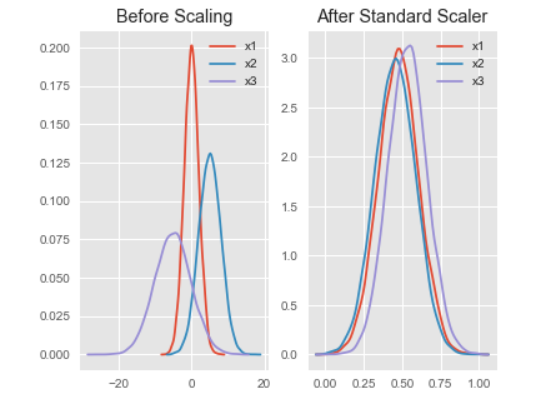

In [26]:
scaler = StandardScaler()
x_train  = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
model = LogisticRegression(solver='liblinear',C=0.05,multi_class='ovr',random_state=2024)
model.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [28]:
model.score(x_train,y_train)

0.9680772086117297

In [29]:
model.score(x_test,y_test)

0.9444444444444444

In [30]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

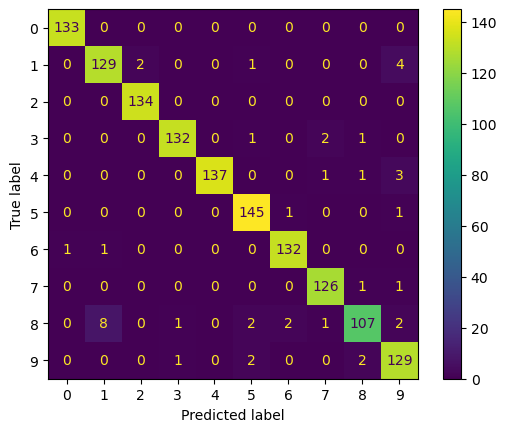

In [32]:
cm = confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

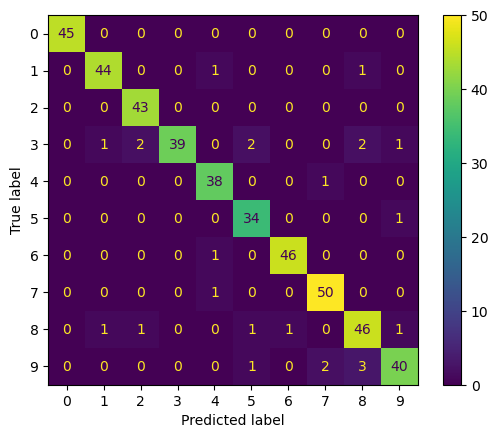

In [33]:
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
print('Train Set')
print(classification_report(y_train,y_pred_train))
print('Test Set')
print(classification_report(y_test,y_pred_test))

Train Set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       133
           1       0.93      0.95      0.94       136
           2       0.99      1.00      0.99       134
           3       0.99      0.97      0.98       136
           4       1.00      0.96      0.98       142
           5       0.96      0.99      0.97       147
           6       0.98      0.99      0.98       134
           7       0.97      0.98      0.98       128
           8       0.96      0.87      0.91       123
           9       0.92      0.96      0.94       134

    accuracy                           0.97      1347
   macro avg       0.97      0.97      0.97      1347
weighted avg       0.97      0.97      0.97      1347

Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.96      0.96        46
           2       0.93      1.00      0.97        43
     

# Parametric vs Non Parametric Models

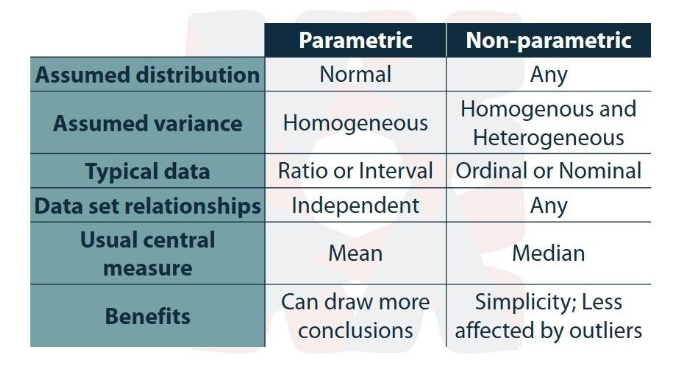

# K-Nearest Neighbour

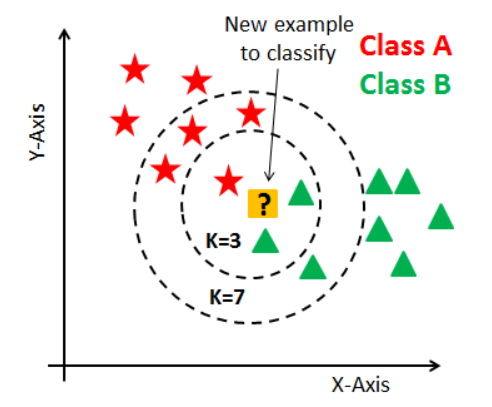

In [35]:
#Feature 1
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy',
          'Sunny','Overcast','Overcast','Rainy']
# Feature 2
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool',
       'Mild','Mild','Mild','Hot','Mild']

# Label atau target
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

print(len(weather),len(temp),len(play))

14 14 14


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
weather_enc = le.fit_transform(weather) #var 1
temp_enc = le.fit_transform(temp) #var 2
play_enc = le.fit_transform(play) #var target
print(weather_enc)
print(temp_enc)
print(play_enc)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [37]:
features = list(zip(weather_enc,temp_enc))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [38]:
from sklearn.neighbors import KNeighborsClassifier
x = features
y  = play_enc
model = KNeighborsClassifier(n_neighbors=3) #n_neighbors adalah jumlah k

model.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

weather = Sunny:2, Rainy:1, Overcast: 0

temp = Mild :2 , Hot: 1 , Cool:0

play = Yes:1 , No:0

Ketika kondisi Overcast dan Temperature Mild akan Play atau tidak?

In [39]:
predicted = model.predict([[1,1]])
print(predicted)

[0]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
y_pred = model.predict(x)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



## KNN with Multiple Labels (Multiclass)

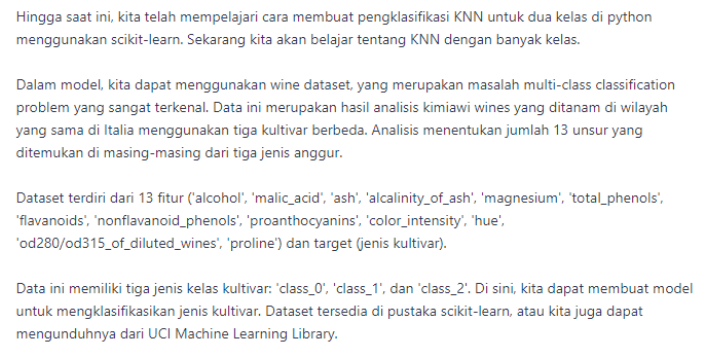

In [42]:
from sklearn.datasets import load_wine

In [43]:
wine = load_wine()

In [44]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [45]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [46]:
wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [47]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [48]:
wine['data'].shape

(178, 13)

In [49]:
wine['target'].shape

(178,)

In [50]:
import pandas as pd

In [51]:
x = pd.DataFrame(wine['data'],columns=wine['feature_names'])
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [53]:
y = pd.DataFrame(wine['target'],columns=['kultivar'])
y

,kultivar
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [54]:
X_train , X_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2024)

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
from sklearn.metrics import accuracy_score

print('Accuracy :', accuracy_score(y_test,y_pred))

Accuracy : 0.6481481481481481


In [57]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train,y_train)

y_pred_7 = knn.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
from sklearn.metrics import accuracy_score

print('Accuracy :', accuracy_score(y_test,y_pred_7))

Accuracy : 0.6481481481481481


In [59]:
y_pred

array([2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 0, 1, 1])

In [60]:
error = []

# kalkulasi eror untuk k_values between 1 dan 40

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test['kultivar']))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Text(0, 0.5, 'Error Rate')

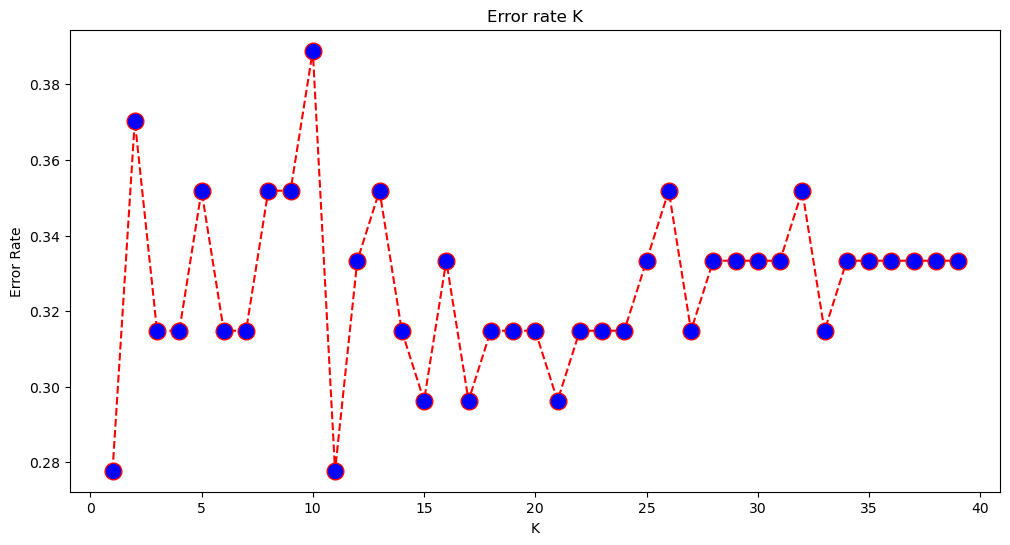

In [62]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red',linestyle='dashed',marker='o', markerfacecolor='blue',markersize=12)
plt.title('Error rate K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train,y_train)

y_pred_11 = knn_11.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred_11) )

Accuracy: 0.7222222222222222


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [64]:
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train_scaled,y_train)
y_pred_11_scaled = knn_11.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test,y_pred_11_scaled) )

Accuracy: 0.9814814814814815


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
y_pred_train = knn_11.predict(X_train_scaled)
y_pred_test = knn_11.predict(X_test_scaled)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [68]:
print('Train Set')
print(classification_report(y_train,y_pred_train))
print('Test Set')
print(classification_report(y_test,y_pred_test))

Train Set
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.98      0.96      0.97        51
           2       1.00      1.00      1.00        32

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124

Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.95      0.97        20
           2       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

